In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
print('df shape: ', df.shape)
df.info()

df shape:  (366, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [6]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [7]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

**EDA** is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the **data imbalance** and skewness of the data.

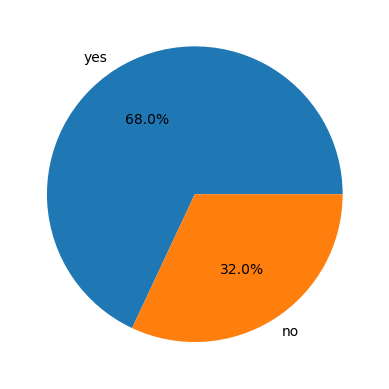

In [11]:
plt.pie(df['rainfall'].value_counts().values,
         labels = df['rainfall'].value_counts().index,
         autopct='%1.1f%%')
plt.show()

In [12]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [13]:
features = list(df.select_dtypes(include=np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


Check the distribution of the continuous features given in the dataset

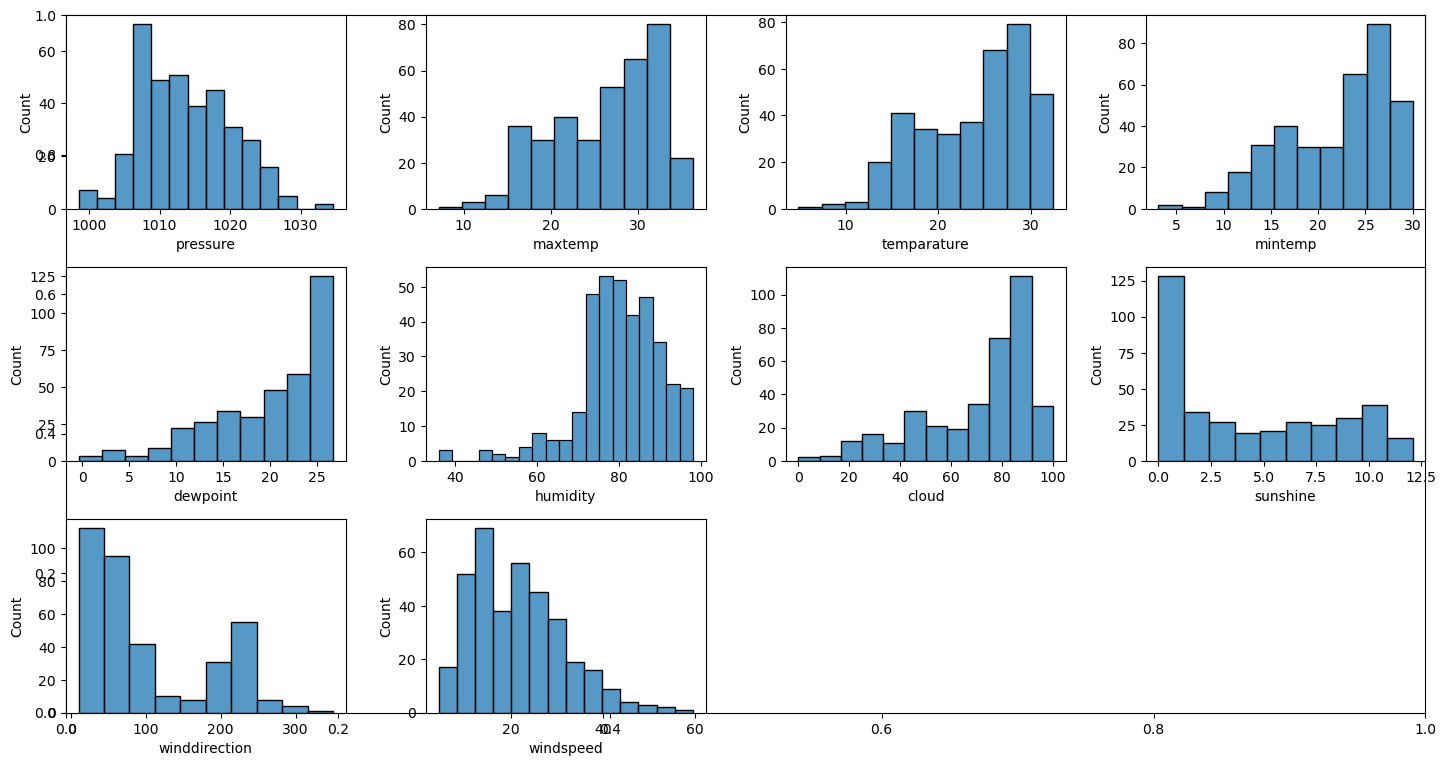

In [22]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sb.histplot(df[col])
plt.tight_layout()
plt.show()

Alternatively, pandas can be used to plot the histograms for the dataframe.

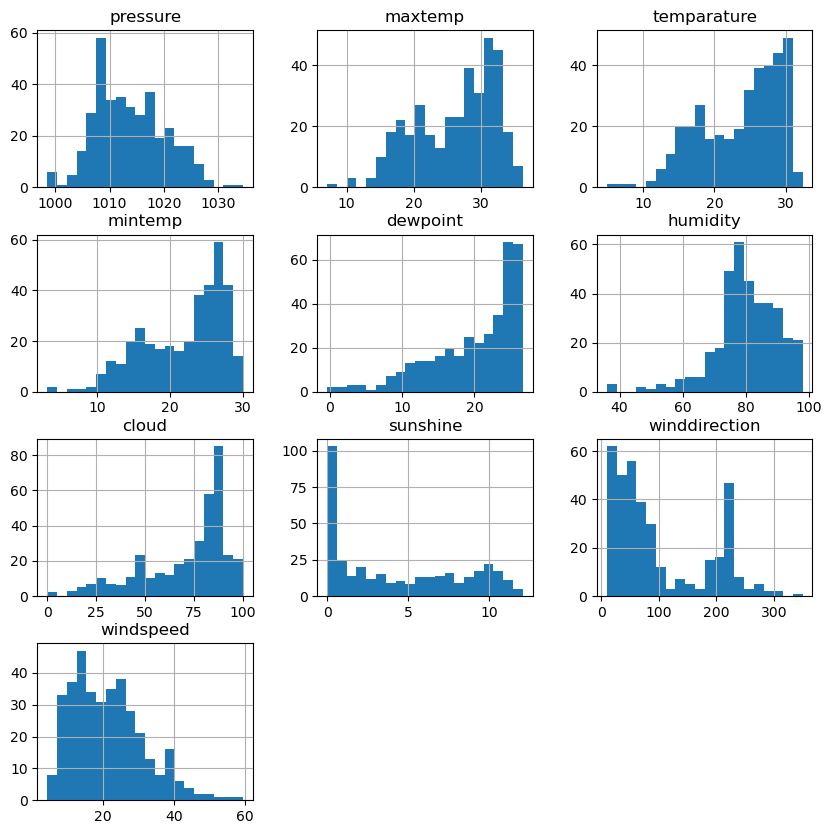

In [23]:
df.hist(column=features, bins=20, figsize=(10,10))
plt.show()

Boxplots help with the detection of the outliers.
There are outliers in the data but sadly we do not have much data so, we cannot remove this (indicated by the isolated dots).

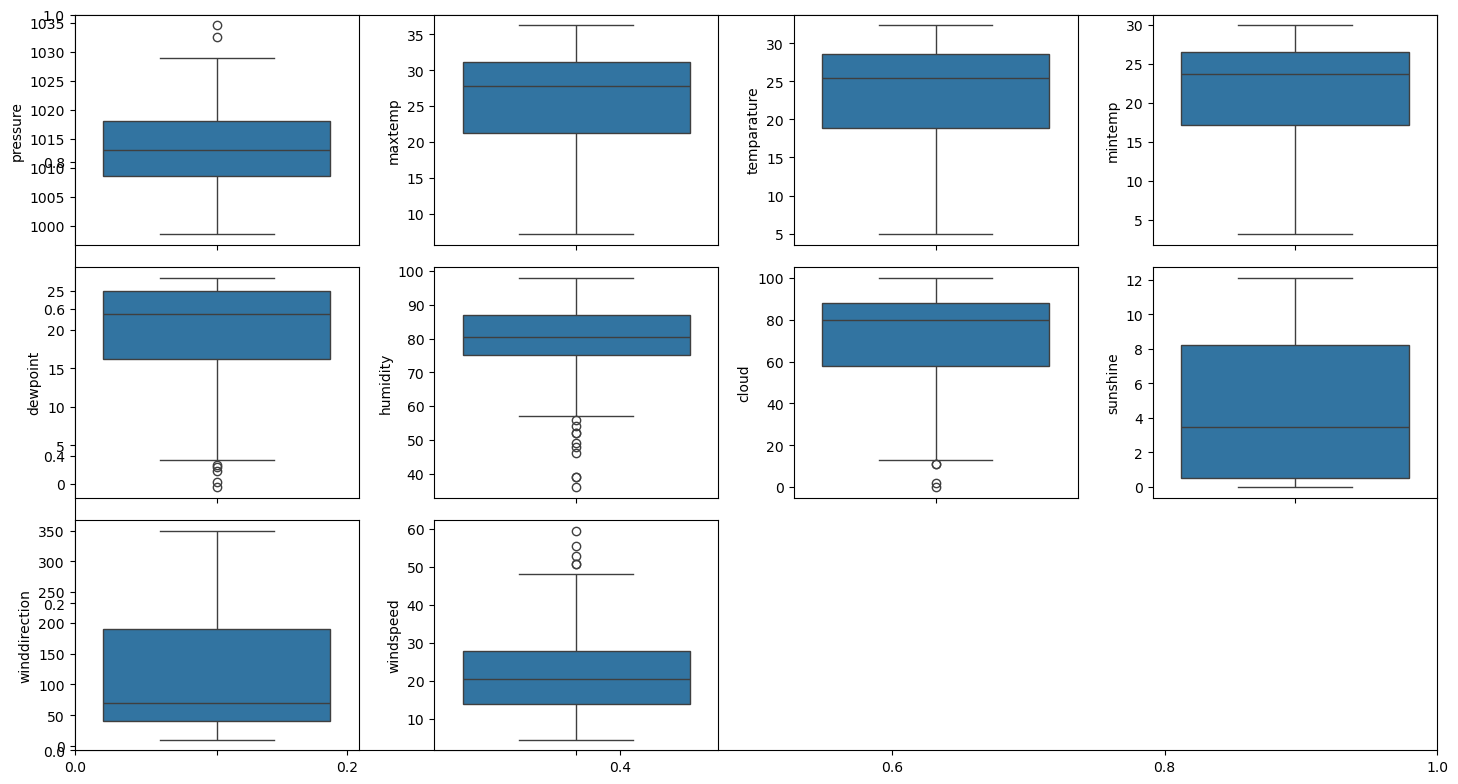

In [18]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [19]:
df.replace({'yes':1, 'no':0}, inplace=True)

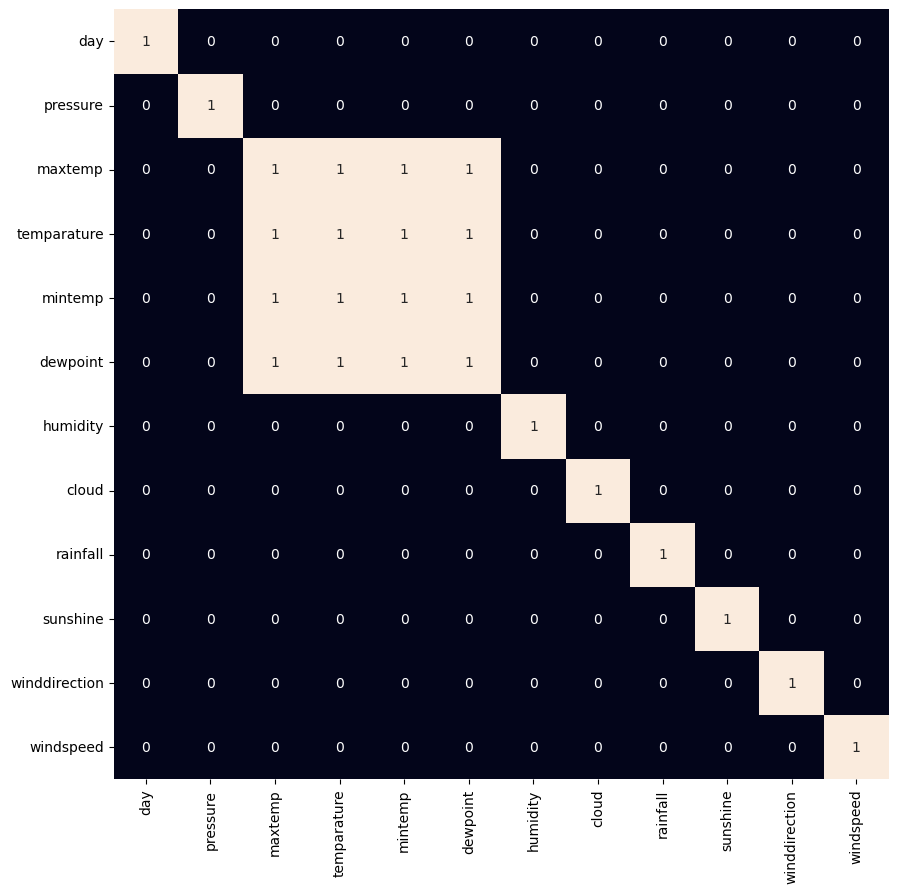

In [24]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

Now we will remove the **highly correlated features** ‘maxtemp’ and ‘mintemp’. But why not temp or dewpoint? This is because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions.

In [25]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

## Model Training

Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.

In [26]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, \
    y_train, y_test = train_test_split(
        features,
        target,
        test_size=0.2,
        stratify=target,
        random_state=2
    )

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',
                       random_state=22)
X, y = ros.fit_resample(X_train, y_train)

In [ ]:
# Normalizing the features for stable and fast training.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_test)

Now let’s train some state-of-the-art models for classification and train them on our training data.
- LogisticRegression
- XGBClassifier
- SVC

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
model_labels = ['LogisticRegression', 'XGBClassifier', 'SVC']

for i in range(3):
    models[i].fit(X,y)

    print(f'{models[i]}: ')

    train_preds = models[i].predict_proba(X)
    print('Training Accuracy: ',
          metrics.roc_auc_score(y,train_preds[:,1]))
    
    val_preds = models[i].predict_proba(X_test)
    print('Validation Accuracy: ',
          metrics.roc_auc_score(y_test,val_preds[:,1]), '\n')

LogisticRegression(): 
Training Accuracy:  0.8884119087901821
Validation Accuracy:  0.8833333333333333 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy:  0.9999999999999999
Validation Accuracy:  0.8391666666666666 

SVC(probability=True): 
Training Accuracy:  0.8783490

## Model Evaluation

From the above accuracies, we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. Let’s plot the **confusion matrix** as well for the validation data using the SVC model.

Uses: [Confusion Matrix Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)

Model evaluated:  LogisticRegression


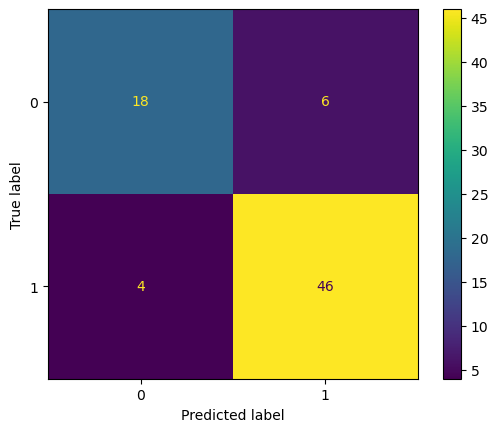

Model evaluated:  XGBClassifier


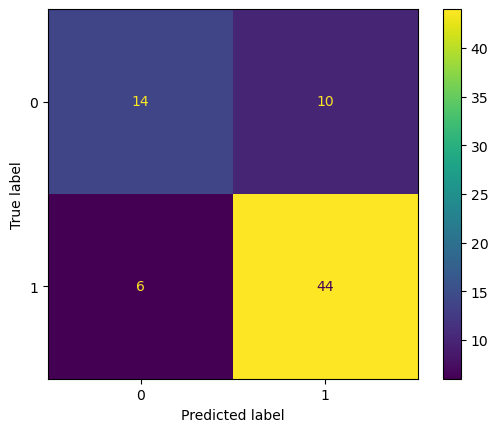

Model evaluated:  SVC


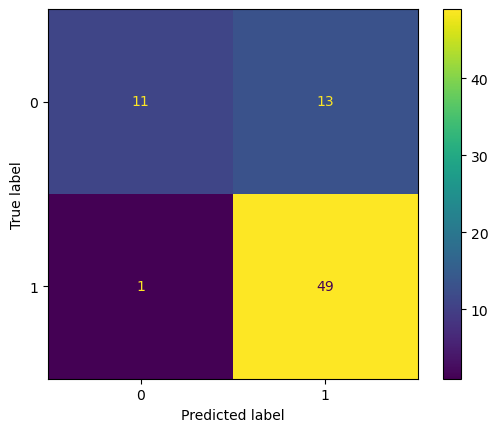

In [41]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
model_labels = ['LogisticRegression', 'XGBClassifier', 'SVC']

for i in range(3):
    print('Model evaluated: ', model_labels[i])
    ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test)
    plt.show()